In [1]:
import pandas as pd
import plotly.graph_objects as go
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

C:\Users\orteg\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\orteg\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading and Checking the Data

In [2]:
df = pd.read_csv('accepted_only_data.csv')

In [3]:
df.head()

,Unnamed: 0,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,emp_title,funded_amnt,hardship_flag,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,int_rate
0,0,3600.0,Debt consolidation,675,679,5.91,190xx,PA,10+ years,leadman,3600.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,13.99
1,1,24700.0,Business,715,719,16.06,577xx,SD,10+ years,Engineer,24700.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,11.99
2,2,35000.0,Debt consolidation,785,789,17.06,076xx,NJ,10+ years,Information Systems Officer,35000.0,N,MORTGAGE,Current,Individual,Dec-2015,1,1,14.85
3,3,10400.0,Major purchase,695,699,25.37,174xx,PA,3 years,Contract Specialist,10400.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,22.45
4,4,11950.0,Debt consolidation,690,694,10.20,300xx,GA,4 years,Veterinary Tecnician,11950.0,N,RENT,Fully Paid,Individual,Dec-2015,1,1,13.44


In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [5]:
df.head()

,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,emp_title,funded_amnt,hardship_flag,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,int_rate
0,3600.0,Debt consolidation,675,679,5.91,190xx,PA,10+ years,leadman,3600.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,13.99
1,24700.0,Business,715,719,16.06,577xx,SD,10+ years,Engineer,24700.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,11.99
2,35000.0,Debt consolidation,785,789,17.06,076xx,NJ,10+ years,Information Systems Officer,35000.0,N,MORTGAGE,Current,Individual,Dec-2015,1,1,14.85
3,10400.0,Major purchase,695,699,25.37,174xx,PA,3 years,Contract Specialist,10400.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,22.45
4,11950.0,Debt consolidation,690,694,10.20,300xx,GA,4 years,Veterinary Tecnician,11950.0,N,RENT,Fully Paid,Individual,Dec-2015,1,1,13.44


In [6]:
df[['issue_month', 'issue_year']] = df.issue_d.str.split("-", expand = True)

In [7]:
df.head()

,loan_amnt,title,fico_range_low,fico_range_high,dti,zip_code,addr_state,emp_length,emp_title,funded_amnt,hardship_flag,home_ownership,loan_status,application_type,issue_d,policy_code,Applicant_Result,int_rate,issue_month,issue_year
0,3600.0,Debt consolidation,675,679,5.91,190xx,PA,10+ years,leadman,3600.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,13.99,Dec,2015
1,24700.0,Business,715,719,16.06,577xx,SD,10+ years,Engineer,24700.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,11.99,Dec,2015
2,35000.0,Debt consolidation,785,789,17.06,076xx,NJ,10+ years,Information Systems Officer,35000.0,N,MORTGAGE,Current,Individual,Dec-2015,1,1,14.85,Dec,2015
3,10400.0,Major purchase,695,699,25.37,174xx,PA,3 years,Contract Specialist,10400.0,N,MORTGAGE,Fully Paid,Individual,Dec-2015,1,1,22.45,Dec,2015
4,11950.0,Debt consolidation,690,694,10.20,300xx,GA,4 years,Veterinary Tecnician,11950.0,N,RENT,Fully Paid,Individual,Dec-2015,1,1,13.44,Dec,2015


## Trying to Graph

Values 2015 and after have been significantly reduced. I assume that means the free write option has been removed and a list is given.

In [8]:
df['title'].value_counts()

Debt consolidation           1071649
Credit card refinancing       434772
Home improvement              125079
Other                         116275
Major purchase                 41571
                              ...   
Paying it Forward~                 1
final credit card pay off          1
Short-term investment              1
Old home loan                      1
Credit Card Financing              1
Name: title, Length: 59289, dtype: int64

In [9]:
df['issue_year'] = df['issue_year'].astype("int64")

# NLP

In [10]:
home = ['home', 'house', 'kitchen', 'improvement', 'pool', 'remodel']
car = ['car', 'auto', 'motorcycle', 'vehicle', 'truck']
business = ['business']
medical = ['medical', 'remove']
debt_credit_issues = ['consolidation', 'credit', 'debt', 'refinancing', 'card', 'cc', 'consolidate', 'payoff', 
                      'interest', 'rate'] 
moving = ['move', 'moving']
major_purchase = ['purchase', 'major']
vacation = ['vacation']
wedding = ['wedding', 'ring']
student = ['student', 'college', 'education', 'school']
#If not categories match, then it will be placed into the 'other' category

In [11]:
df["reduced_reason"] = "Test"

In [12]:
df['title'] = df['title'].apply(str.lower)

In [13]:
my_dict = {"Home": home, "Car": car, "Business": business, "Medical": medical, "Vacation": vacation, "Wedding": wedding,
        "Moving": moving, "Student": student, "Major Purchase": major_purchase, "Debt/Credit Issues": debt_credit_issues}

In [14]:
for k, v in my_dict.items():
    for word in v:
        df.loc[df['title'].str.contains(word), 'reduced_reason'] = k

In [15]:
df['reduced_reason'][df['reduced_reason'] == "Test"] = "Other"

C:\Users\orteg\AppData\Local\Temp\ipykernel_36376\57583683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reduced_reason'][df['reduced_reason'] == "Test"] = "Other"


In [16]:
df['reduced_reason'].value_counts()

Debt/Credit Issues    1615026
Other                  170222
Home                   146473
Major Purchase          42914
Medical                 23935
Car                     21831
Business                21160
Moving                  13964
Vacation                13785
Wedding                  2733
Student                   662
Name: reduced_reason, dtype: int64

In [17]:
df['title'][df['reduced_reason']=='Other'].value_counts()

other                               116355
personal loan                         3162
personal                              1881
loan                                  1510
freedom                               1183
                                     ...  
i want to graduate on time!              1
purchasing landscape cad program         1
hfcscrewedme                             1
ford torres                              1
3yr conolidation                         1
Name: title, Length: 22159, dtype: int64

In [18]:
simple_df = df[['reduced_reason', 'issue_month', 'issue_year']]

In [19]:
group_dates = simple_df.groupby(['issue_year', 'issue_month', 
                                 'reduced_reason']).size()

In [20]:
group_dates = pd.DataFrame(group_dates, columns=['count'])

In [21]:
group_dates.reset_index(inplace=True)

In [22]:
group_dates.head(10)

,issue_year,issue_month,reduced_reason,count
0,2007,Aug,Business,1
1,2007,Aug,Car,3
2,2007,Aug,Debt/Credit Issues,31
3,2007,Aug,Home,4
4,2007,Aug,Moving,2
5,2007,Aug,Other,18
6,2007,Aug,Student,4
7,2007,Aug,Vacation,1
8,2007,Aug,Wedding,1
9,2007,Dec,Business,5


In [23]:
group_dates['month'] = ""

In [24]:
group_dates['month'][group_dates['issue_month']=="Aug"] = "August"
group_dates['month'][group_dates['issue_month']=="Jan"] = "January"
group_dates['month'][group_dates['issue_month']=="Feb"] = "February"
group_dates['month'][group_dates['issue_month']=="Mar"] = "March"
group_dates['month'][group_dates['issue_month']=="Apr"] = "April"
group_dates['month'][group_dates['issue_month']=="May"] = "May"
group_dates['month'][group_dates['issue_month']=="Jun"] = "June"
group_dates['month'][group_dates['issue_month']=="Jul"] = "July"
group_dates['month'][group_dates['issue_month']=="Sep"] = "September"
group_dates['month'][group_dates['issue_month']=="Oct"] = "October"
group_dates['month'][group_dates['issue_month']=="Nov"] = "November"
group_dates['month'][group_dates['issue_month']=="Dec"] = "December"

C:\Users\orteg\AppData\Local\Temp\ipykernel_36376\3373904084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_dates['month'][group_dates['issue_month']=="Aug"] = "August"
C:\Users\orteg\AppData\Local\Temp\ipykernel_36376\3373904084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_dates['month'][group_dates['issue_month']=="Jan"] = "January"
C:\Users\orteg\AppData\Local\Temp\ipykernel_36376\3373904084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [25]:
group_dates.head()

,issue_year,issue_month,reduced_reason,count,month
0,2007,Aug,Business,1,August
1,2007,Aug,Car,3,August
2,2007,Aug,Debt/Credit Issues,31,August
3,2007,Aug,Home,4,August
4,2007,Aug,Moving,2,August


In [26]:
from calendar import month_name
month_lookup = list(month_name)

In [27]:
group_dates['month'] = pd.Categorical(group_dates['month'], categories=month_lookup, ordered=True)

In [28]:
group_dates.sort_values(by=['month', 'reduced_reason'],inplace=True)

In [29]:
%pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [30]:
import plotly.io as pio
import plotly.express as px
import numpy as np

In [38]:
fig = px.bar_polar(group_dates, r="count",theta='issue_month',
                   color="reduced_reason", labels={"reduced_reason": "Loan Types"})

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.80,
    xanchor="left",
    x=1.1,
    bgcolor="LightGray",
    bordercolor="Black",
    borderwidth=1),font=dict(
        size=50)#,
    #title={
    #'text': "Distribution of Loan Types by Month",
    #'y':0.99999,
    #'x':0.45,
    #'xanchor': 'center',
    #'yanchor': 'top'}
                 )
fig.update_polars(radialaxis_nticks=11)
fig.update_polars(angularaxis_tickfont_size=50)
fig.update_polars(radialaxis_tickfont_size=60)
fig.update_polars(radialaxis_angle=70)
fig.update_polars(radialaxis_tickangle=90)
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 1680,
    'width': 2380,
    'scale':5 # Multiply title/legend/axis/canvas sizes by this factor
  }
}
fig.show(config=config)
#pio.write_image(fig, 'Rose_Graph.png', scale=10, width=1980, height=1080)

In [32]:
group_dates.head()

,issue_year,issue_month,reduced_reason,count,month
96,2008,Jan,Business,8,January
216,2009,Jan,Business,2,January
345,2010,Jan,Business,6,January
476,2011,Jan,Business,28,January
608,2012,Jan,Business,73,January


In [33]:
group_dates.groupby(['issue_month', 'reduced_reason'])[['count']].sum()

count
issue_month reduced_reason            
Apr         Business              1742
            Car                   1812
            Debt/Credit Issues  125518
            Home                 13295
            Major Purchase        3728
...                                ...
Sep         Moving                1138
            Other                13364
            Student                 58
            Vacation               925
            Wedding                290

[132 rows x 1 columns]

In [34]:
import matplotlib.pyplot as plt

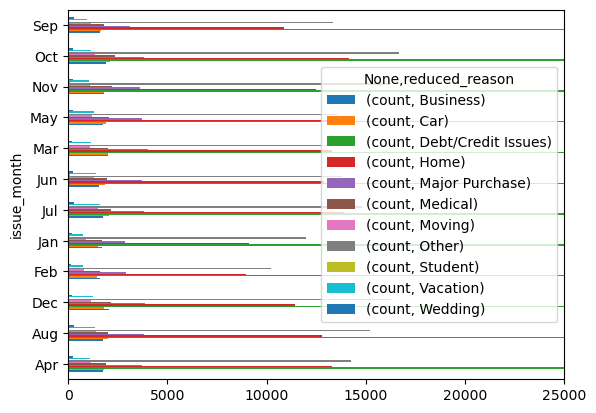

In [35]:
group_dates.groupby(['issue_month', 'reduced_reason'])[['count']].sum().unstack().plot(kind='barh')
plt.xlim(0, 25000)
plt.show()

## Make an animation of this?